In [118]:
from backtesting import readers, backtest
from backtesting.output import TestOutput
from backtesting.trade_simulation import Simulation

from metrics.filters import Filters
from metrics.metrics import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
reader = readers.OrderbookReader('../tests/resources/orderbook10/orderbook.csv.gz',
                                 '../tests/resources/orderbook10/trades.csv.gz',
                                 pairs_to_load=5)

callables = [
  ('trades volume', lambda trades: sum(map(lambda x: x.volume, trades))),
  ('trades length', lambda trades: len(trades))
]

instant_metrics = [
  VWAP_depth(3),
  VWAP_volume(volume=int(1e5))
]
instant_metric_names = []
for metric in instant_metrics:
    instant_metric_names += metric.names()

time_metrics = [TimeMetric(callables, 60), TimeMetric(callables, 30)]

simulation = Simulation(instant_metrics, time_metrics=time_metrics)
output = TestOutput(instant_metric_names=instant_metric_names,
                    time_metric_names=[metric.metric_names for metric in time_metrics])
backtester = backtest.Backtest(reader, simulation, output)

backtester.run()

2020-03-05 08:17:02,964 - <backtest> - INFO - Initialized <Backtest with reader=<orderbook-reader on orderbook_file=../tests/resources/orderbook10/orderbook.csv.gz, trades_file=../tests/resources/orderbook10/trades.csv.gz, batch_nrows=10000>>
2020-03-05 08:17:03,000 - <backtest> - INFO - Backtest initialize run
2020-03-05 08:17:30,592 - <backtest> - INFO - Backtest finished run


In [120]:
instant_metrics = output.instant_metrics
time_metrics = output.time_metrics
trades = output.trades
snapshots = output.snapshots

instant_metric_names, time_metric_names = output.instant_metric_names, output.time_metric_names

In [121]:
time_metric_names =time_metric_names[0] + time_metric_names[1] 

In [122]:
time_metric_names

['trades volume_60',
 'trades length_60',
 'trades volume_30',
 'trades length_30']

In [5]:
xbtusd_values = instant_metrics[('snapshot-instant-metric','XBTUSD')]
xbtusd_values = [[x[0]] + x[1] for x in xbtusd_values]
xbtusd_instant = pd.DataFrame(xbtusd_values, columns=['timestamp'] + instant_metric_names)

In [6]:
xbtusd_instant.tail()

,timestamp,VWAP (Depth): 3 bid,VWAP (Depth): 3 ask,VWAP (Depth): 3 midpoint,<VWAP (Volume): 100000> bid,<VWAP (Volume): 100000> ask,<VWAP (Volume): 100000> midpoint
5200,2020-03-04 11:20:49.341,8714.949152,8715.506349,8715.227751,8715.000000,8716.20220,8715.601100
5201,2020-03-04 11:20:49.392,8714.949152,8715.506349,8715.227751,8715.000000,8716.17577,8715.587885
5202,2020-03-04 11:20:49.454,8714.949303,8715.506349,8715.227826,8715.000000,8716.17577,8715.587885
5203,2020-03-04 11:20:49.526,8714.982098,8715.506349,8715.244224,8714.696205,8716.17577,8715.435988
5204,2020-03-04 11:20:49.551,8714.980689,8715.506349,8715.243519,8714.696205,8716.17577,8715.435988


In [11]:
trade_obj = [t[1].to_list() for t in trades] 
trade_obj = pd.DataFrame(trade_obj, columns=['symbol', 'timestamp', 'action', 'price', 'volume'])

In [14]:
trade_obj.head()

,symbol,timestamp,action,price,volume
0,XBTUSD,2020-03-04 11:18:35.752,Sell,8724.0,115
1,ETHUSD,2020-03-04 11:18:36.090,Sell,222.9,1564
2,XBTUSD,2020-03-04 11:18:37.355,Sell,8724.0,2880
3,XBTUSD,2020-03-04 11:18:38.287,Buy,8724.5,5000
4,XBTUSD,2020-03-04 11:18:39.749,Buy,8724.5,100


In [49]:
trades_xbt = trade_obj[trade_obj.symbol == 'XBTUSD']
trade_sell = trades_xbt[trades_xbt.action == 'Sell']
trade_buy = trades_xbt[trades_xbt.action == 'Buy']


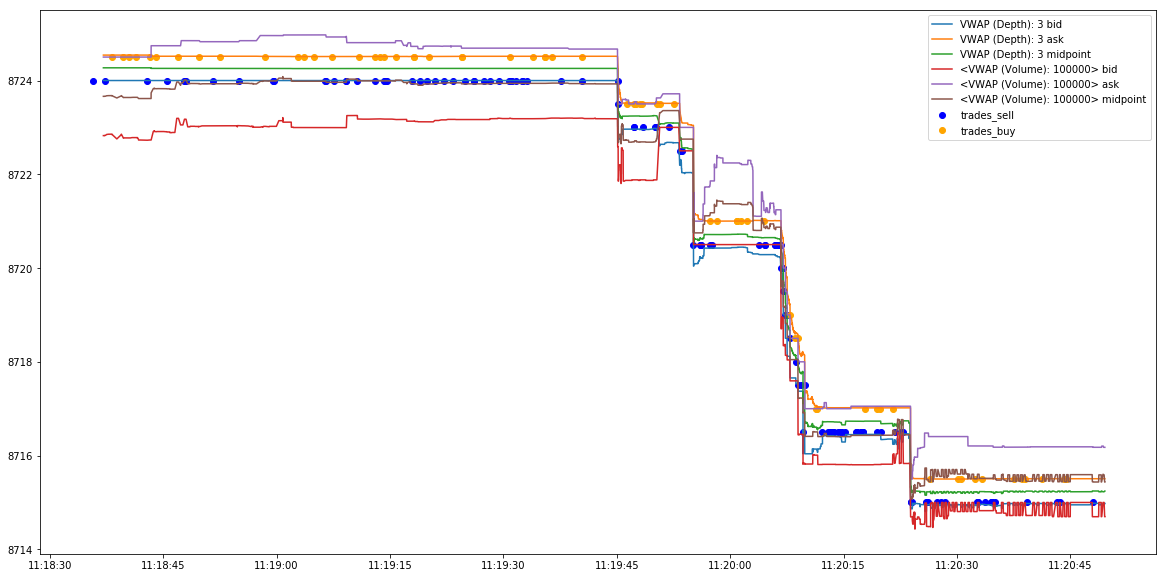

In [50]:
plt.figure(figsize=(20,10))
lines = plt.plot(xbtusd_instant.iloc[:, 0],xbtusd_instant.iloc[:, 1:])
plt.scatter(trade_sell.iloc[:, 1], trade_sell.iloc[:, 3], c='b')
plt.scatter(trade_buy.iloc[:, 1], trade_buy.iloc[:, 3], c='orange')


plt.legend(instant_metric_names + ['trades_sell', 'trades_buy'])

In [92]:
ethusd_values = instant_metrics[('snapshot-instant-metric','ETHUSD')]
ethusd_values = [[x[0]] + x[1] for x in ethusd_values]
ethusd_instant = pd.DataFrame(ethusd_values, columns=['timestamp'] + instant_metric_names)

In [65]:
trades_eth = trade_obj[trade_obj.symbol == 'ETHUSD']
trade_sell = trades_eth[trades_eth.action == 'Sell']
trade_buy = trades_eth[trades_eth.action == 'Buy']


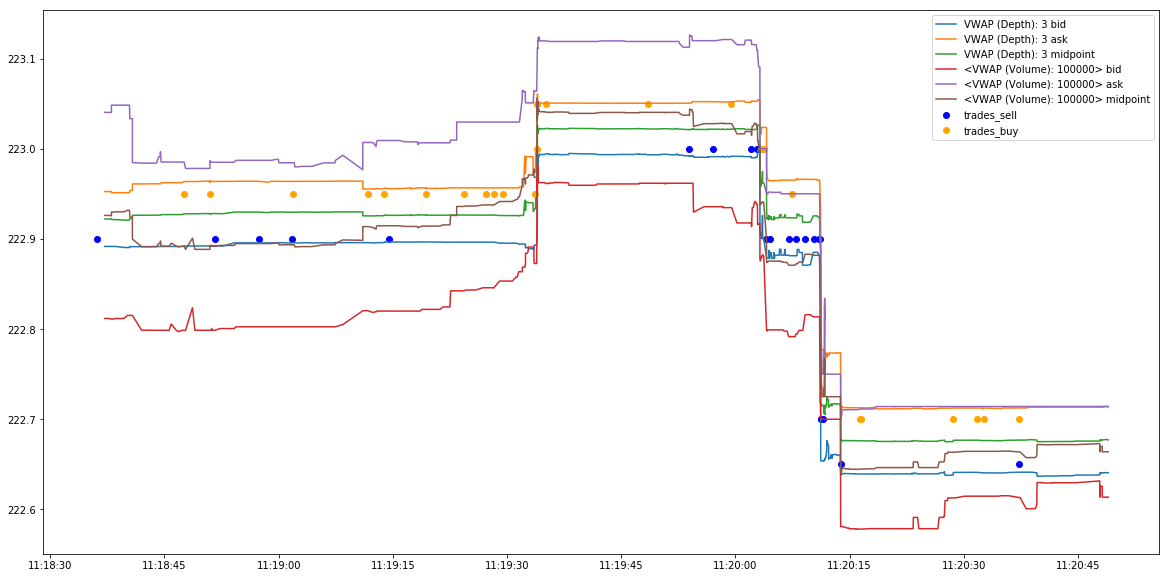

In [66]:
plt.figure(figsize=(20,10))
lines = plt.plot(ethusd_instant.iloc[:, 0],ethusd_instant.iloc[:, 1:])
plt.scatter(trade_sell.iloc[:, 1], trade_sell.iloc[:, 3], c='b')
plt.scatter(trade_buy.iloc[:, 1], trade_buy.iloc[:, 3], c='orange')


plt.legend(instant_metric_names + ['trades_sell', 'trades_buy'])

In [67]:
ethusd_instant.head()

,timestamp,VWAP (Depth): 3 bid,VWAP (Depth): 3 ask,VWAP (Depth): 3 midpoint,<VWAP (Volume): 100000> bid,<VWAP (Volume): 100000> ask,<VWAP (Volume): 100000> midpoint
0,2020-03-04 11:18:37.164,222.891633,222.952432,222.922033,222.811736,223.040320,222.926028
1,2020-03-04 11:18:37.405,222.891633,222.952432,222.922033,222.811736,223.040191,222.925964
2,2020-03-04 11:18:37.500,222.891633,222.952451,222.922042,222.811736,223.040191,222.925964
3,2020-03-04 11:18:37.515,222.891633,222.952475,222.922054,222.811736,223.040191,222.925964
4,2020-03-04 11:18:37.737,222.891633,222.952475,222.922054,222.811736,223.040191,222.925964


In [96]:
def time_metric_df(time_metrics, symbol, action, seconds):
    df = pd.DataFrame(time_metrics[('trade-time-metric', symbol, action, seconds)])
    df1 = df.loc[:, 1].apply(lambda x: pd.Series(x))
    df1['timestamp'] = df.loc[:, 0]
    df1.columns = time_metric_names + ['timestamp']
    return df1

In [104]:
xbtusd_sell = time_metric_df(time_metrics, 'XBTUSD', 'Sell', 30)
xbtusd_buy = time_metric_df(time_metrics, 'XBTUSD', 'Buy', 30)


ethusd_sell = time_metric_df(time_metrics, 'ETHUSD', 'Sell', 30)
ethusd_buy = time_metric_df(time_metrics, 'ETHUSD', 'Buy', 30)


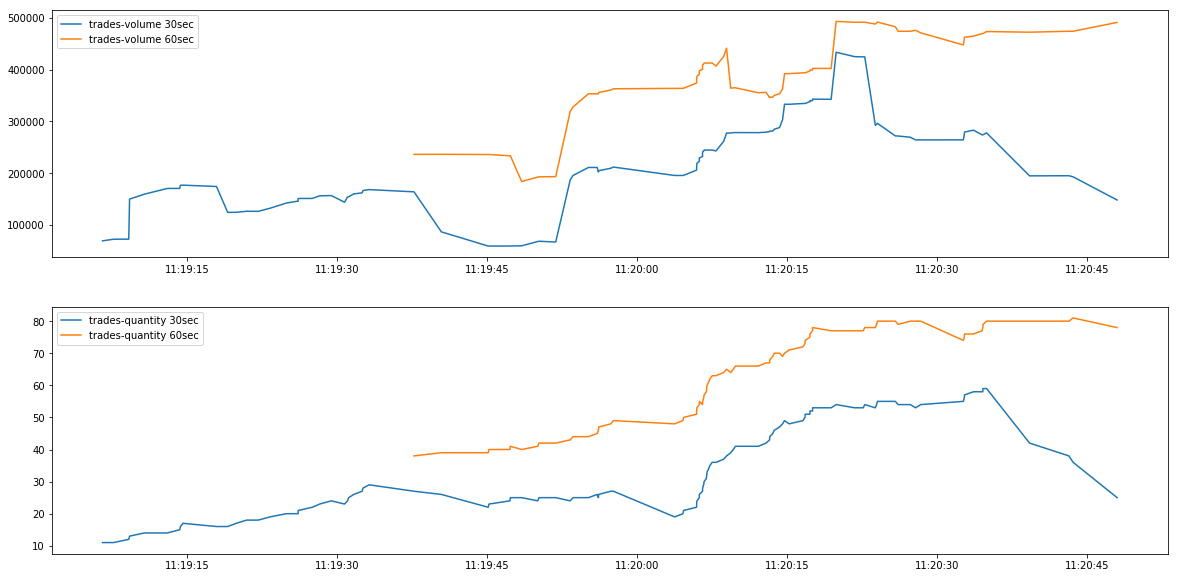

In [117]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(xbtusd_sell.iloc[11:,-1], xbtusd_sell.iloc[11:, 2])
plt.plot(xbtusd_sell.iloc[39:,-1], xbtusd_sell.iloc[39:, 0])
plt.legend(['trades-volume 30sec', 'trades-volume 60sec'])

plt.subplot(212)
plt.plot(xbtusd_sell.iloc[11:,-1], xbtusd_sell.iloc[11:, 3])
plt.plot(xbtusd_sell.iloc[39:,-1], xbtusd_sell.iloc[39:, 1])
plt.legend(['trades-quantity 30sec', 'trades-quantity 60sec'])




In [111]:
xbtusd_sell[30:50]

,trades volume_60,trades length_60,trades volume_30,trades length_30,timestamp
30,-1.0,-1.0,156105.0,23.0,2020-03-04 11:19:28.230
31,-1.0,-1.0,156605.0,24.0,2020-03-04 11:19:29.400
32,-1.0,-1.0,143752.0,23.0,2020-03-04 11:19:30.725
33,-1.0,-1.0,153752.0,24.0,2020-03-04 11:19:31.018
34,-1.0,-1.0,154329.0,25.0,2020-03-04 11:19:31.139
35,-1.0,-1.0,159857.0,26.0,2020-03-04 11:19:31.651
36,-1.0,-1.0,161857.0,27.0,2020-03-04 11:19:32.482
37,-1.0,-1.0,166468.0,28.0,2020-03-04 11:19:32.576
38,-1.0,-1.0,168145.0,29.0,2020-03-04 11:19:33.186
39,236213.0,38.0,163843.0,27.0,2020-03-04 11:19:37.674
